In [1]:
import numpy as np
import pandas as pd
import warnings
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
shap.initjs()
from sklearn.preprocessing import StandardScaler
#mean squared
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import scipy.sparse as sparse

data2012 = pd.read_csv('/home/peter/Documents/DSProject/finalData2012.csv')
data2013 = pd.read_csv('/home/peter/Documents/DSProject/finalData2013.csv')
data2014 = pd.read_csv('/home/peter/Documents/DSProject/finalData2014.csv')

data = pd.read_csv('/home/peter/Documents/DSProject/Data00-13.csv')
data14 = pd.read_csv('/home/peter/Documents/DSProject/Data14-14.csv')

Yearly Actual Values:  15.682634730538922
Yearly Mean Predictions:  16.027517195107944


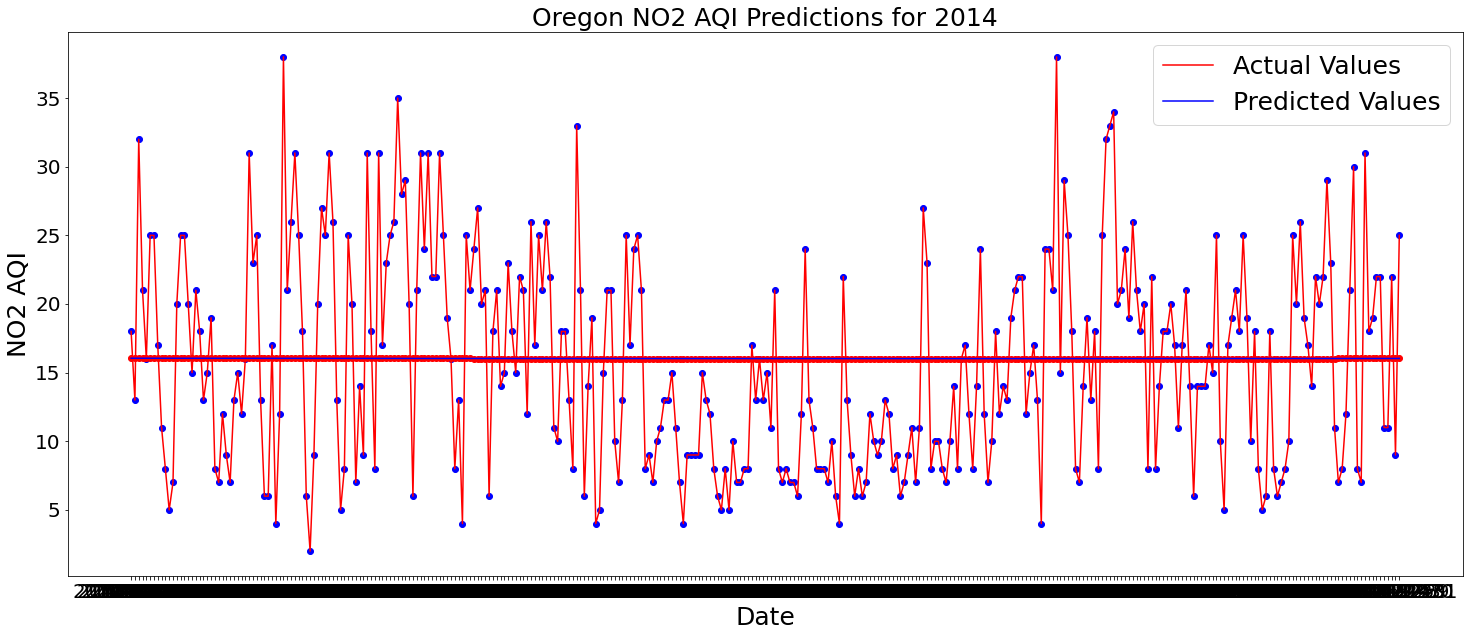

In [80]:
warnings.filterwarnings('ignore')

Selected = "Oregon"

State = data['State'] == Selected
State = data[State]

######################## Daily Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State

pd.DatetimeIndex(Monthly['Date Local'])
date = Monthly['Date Local']
N02 = Monthly['NO2 AQI']
Odate = Monthly['Date Local']
Monthly = pd.DataFrame({'time': date, 'NO2AQI': N02, 'OriginalDate' : Odate})

Monthly['time'] = pd.to_datetime(Monthly['time'])
Monthly['time']=Monthly['time'].map(dt.datetime.toordinal)

x = Monthly.iloc[:,0:1]
y = Monthly.iloc[:,1:2]

lin_regs = LinearRegression()

lin_regs.fit(x,y)

poly_regs = PolynomialFeatures(degree=10)

x_poly = poly_regs.fit_transform(x)

lin_reg_2 = LinearRegression()

lin_reg_2.fit(x_poly,y)

poly_pred = lin_reg_2.predict(poly_regs.fit_transform(x))

State = data14['State'] == Selected
State = data14[State]
######################## Monthly Seperation
State = State.groupby('Date Local').mean().reset_index()
Monthly = State

pd.DatetimeIndex(Monthly['Date Local'])
date = Monthly['Date Local']
N02 = Monthly['NO2 AQI']
Odate = Monthly['Date Local']
Monthly = pd.DataFrame({'time': date, 'NO2AQI': N02, 'OriginalDate' : Odate})
Monthly.time = pd.to_datetime(Monthly.time)

Monthly['time'] = pd.to_datetime(Monthly['time'])
Monthly['time']=Monthly['time'].map(dt.datetime.toordinal)

x = Monthly.iloc[:,0:1]

poly_pred = lin_reg_2.predict(poly_regs.fit_transform(x))

Monthly['Predictions'] =  poly_pred

x = Monthly['time']
y = Monthly['NO2AQI']
z = Monthly['OriginalDate']
o = Monthly['Predictions']

plt.figure(figsize=(25,10))
plt.scatter(z,y,color='blue')
plt.scatter(z,o,color='red')
plt.title(Selected + ' NO2 AQI Predictions for 2014', fontsize=25)

plt.plot(z,y,color='red',label='Actual Values')  
plt.plot(z,o,color='blue',label='Predicted Values')

plt.legend(prop={'size':25})
plt.xlabel('Date',fontsize=25)
plt.ylabel('NO2 AQI',fontsize=25)

plt.xticks(size = 20)
plt.yticks(size = 20)
YearlyMeanPredictions = Monthly['Predictions'].mean()
YearlyMeanActual = Monthly['NO2AQI'].mean()

print('Yearly Actual Values: ' , YearlyMeanActual)
print('Yearly Mean Predictions: ' , YearlyMeanPredictions)